# In Progress!

In [4]:
import requests
from IPython.core.display import HTML
resp=requests.get("http://marketeammenuparisgordonramsaysteak.com/")
print(resp.url)

http://marketeammenuparisgordonramsaysteak.com/


From the website let's first scrape the [dinner menu](http://marketeammenuparisgordonramsaysteak.com/GDSteak_Dinner.pdf) 

In [6]:
resp=requests.get("http://marketeammenuparisgordonramsaysteak.com/GDSteak_Dinner.pdf")
resp.content

b'%PDF-1.6\r%\xe2\xe3\xcf\xd3\r\n20 0 obj\r<</Linearized 1/L 78323/O 22/E 56526/N 3/T 77989/H [ 528 229]>>\rendobj\r                   \r49 0 obj\r<</DecodeParms<</Columns 4/Predictor 12>>/Filter/FlateDecode/ID[<E2D4E01E244EE1D7892BE5CF6DA37948><2B49CDECCE4848D98026502B898FFEAB>]/Index[20 52]/Info 19 0 R/Length 125/Prev 77990/Root 21 0 R/Size 72/Type/XRef/W[1 2 1]>>stream\r\nh\xdebbd\x10``b`z\n$\x18\xedAD\x13\x90`~\x08$\x04v\x02\tyE\x90\xac\x1d\x90\x10y\r\x92\xd8\x0c$\xa4\xba\x80\x04\xeb\x1e\x90\xc4\x1c \xc1\xa5\x06\xe2\xde\x03\x11\xc6 \xc2\x08H\xb0H\x80Xo@\xc4Z\x10a\x08$\xb8\'\x01\t\x86 \x90)\x0bAzm@\xac\xff +\xcdA\xac? \x96\x01\x90\xf0\xb9\xce\xc0\xc4\xc8\xb0\x04\xa4\x98\x81\x91\xd6\xc4\x7f\xa6\x1fo\x00\x02\x0c\x00Ge\x14|\rendstream\rendobj\rstartxref\r0\r%%EOF\r            \r71 0 obj\r<</Filter/FlateDecode/I 156/Length 149/S 79>>stream\r\nh\xdeb```f``\xf2g`e`\x90\xf0b\x10`@\x00\x01\x06\x16\xa0(\x0b\x03\xc7\x01\x96\x83\x01\xc2\xda\x0c\x0c\xab\x0c \x12<\xaa*O\x15\x0e+\xe69\x00\xd9\x8c

In [115]:
with open("temp.pdf", "wb+") as f:
    f.write(resp.content)

In [119]:
import poppler
from poppler import PageRenderer

#API isn't well documented but use https://github.com/cbrunet/python-poppler/blob/master/src/poppler/document.py
#and https://cbrunet.net/python-poppler/usage.html#quickstart
document=poppler.load_from_data(resp.content)
document

In [120]:
help(document)

Help on Document in module poppler.document object:

class Document(builtins.object)
 |  Document(poppler_document, data=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, poppler_document, data=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_destination_map(self)
 |  
 |  create_font_iterator(self, page=0)
 |  
 |  create_page(self, index)
 |  
 |  create_toc(self)
 |  
 |  embedded_files(self)
 |  
 |  fonts(self)
 |  
 |  has_embedded_files(self)
 |  
 |  has_permission(self, which)
 |  
 |  info_date(self, key)
 |  
 |  info_key(self, key)
 |  
 |  info_keys(self)
 |  
 |  infos(self)
 |      Get the document info dictionary as a dict object.
 |  
 |  is_encrypted(self)
 |  
 |  is_linearized(self)
 |  
 |  is_locked(self)
 |  
 |  remove_info(self)
 |  
 |  save(self, file_name)
 |  
 |  save_a_copy(self, file_name)
 |  
 |  set_info_date(self, key, val)
 |  
 |  set_info_key(self, key, val)
 |  
 |  unlock(self, owner_passwor

In [121]:
[x.name for x in document.fonts()]

['UGDKZY+MinionPro-Regular',
 'AAAAAC+Cambria-Bold',
 'AAAAAE+Cambria',
 'AAAAAG+Cambria',
 'AAAAAI+Cambria-Italic',
 'AAAAAK+Cambria-BoldItalic',
 'AAAAAM+Cambria-Bold',
 'AAAAAO+Calibri-BoldItalic']

We know MinionPro and Cambria are the major fonts.

In [122]:
created=document.creation_date
last_changed=document.modification_date
created,last_changed

(datetime.datetime(2022, 3, 25, 19, 18, 10),
 datetime.datetime(2022, 3, 28, 10, 38, 5))

In [123]:
document.creator

'Word'

In [124]:
document.producer

'macOS Version 11.3.1 (Build 20E241) Quartz PDFContext'

In [125]:
document.pages

3

In [127]:
page=document.create_page(0)
help(page)

Help on Page in module poppler.page object:

class Page(builtins.object)
 |  Page(poppler_page)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, poppler_page)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  page_rect(self, box=<page_box_enum.crop_box: 1>)
 |  
 |  search(self, text, r, direction, case_sensitivity, rotation=<rotation_enum.rotate_0: 0>)
 |  
 |  text(self, rect=None, layout_mode=None)
 |  
 |  text_list(self, opt_flag=None)
 |  
 |  transition(self)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  duration
 |  
 |  label
 |  
 |  orientation
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  --------------------------------------------

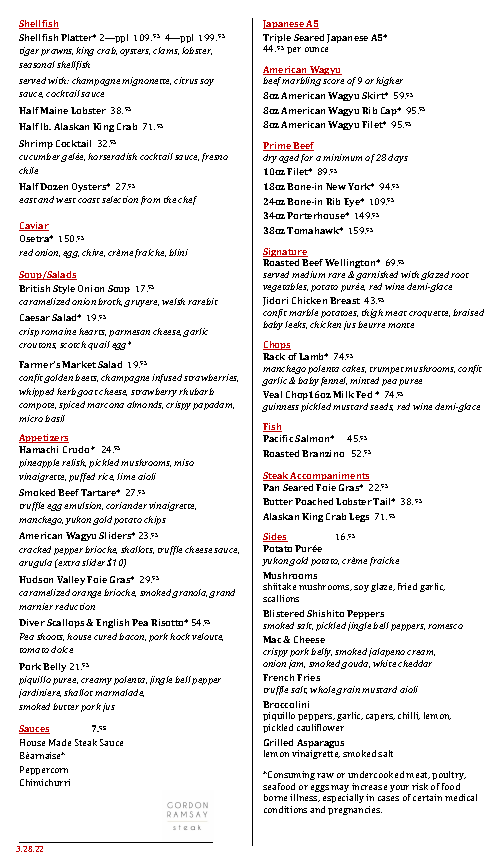

In [139]:
from PIL import Image, ImageTk

image=PageRenderer().render_page(page)

pil_image = Image.frombytes(
    "RGBA",
    (image.width, image.height),
    image.data,
    "raw",
    str(image.format),
 )
pil_image

In [140]:
help(page.text_list()[0])

Help on TextBox in module poppler.page object:

class TextBox(builtins.object)
 |  TextBox(text_box)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, text_box)
 |  
 |  char_bbox(self, i)
 |  
 |  get_font_name(self, i=0)
 |  
 |  get_font_size(self)
 |  
 |  get_wmode(self, i=0)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  bbox
 |  
 |  has_font_info
 |  
 |  has_space_after
 |  
 |  rotation
 |  
 |  text
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  WritingMode = <class 'poppler.cpp.page.writing_mode_enum'>



In [141]:
help(page.text_list()[0].bbox)

Help on Rectangle in module poppler.rectangle object:

class Rectangle(builtins.object)
 |  Rectangle(x=0, y=0, w=0, h=0, poppler_object=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x=0, y=0, w=0, h=0, poppler_object=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  as_tuple(self)
 |  
 |  is_empty(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_object(poppler_object) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  height
 |  
 |  width
 |  
 |  x
 |  
 |  y
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  bottom
 |  
 |  left
 |  


In [142]:
print(page.text(layout_mode=poppler.TextLayout.physical_layout))

Shellfish                                                 Japanese A5
Shellfish Platter* 2—ppl 109. 95 4—ppl 199. 95            Triple Seared Japanese A5*
tiger prawns, king crab, oysters, clams, lobster,         44. 95 per ounce
seasonal shellfish
                                                          American Wagyu
served with: champagne mignonette, citrus soy             beef marbling score of 9 or higher
sauce, cocktail sauce                                     8oz American Wagyu Skirt* 59.95
Half Maine Lobster 38. 95                                 8oz American Wagyu Rib Cap* 95.95
Half lb. Alaskan King Crab 71. 95                         8oz American Wagyu Filet* 95.95
Shrimp Cocktail 32.95                                     Prime Beef
cucumber gelée, horseradish cocktail sauce, fresno        dry aged for a minimum of 28 days
chile                                                     10oz Filet* 89.95
Half Dozen Oysters* 27.95                                 18oz Bone-in New Y

In [159]:
def pil_to_numpy(im):
    im.load()
    # unpack data
    e = Image._getencoder(im.mode, 'raw', im.mode)
    e.setimage(im.im)

    # NumPy buffer for the result
    shape, typestr = Image._conv_type_shape(im)
    data = np.empty(shape, dtype=np.dtype(typestr))
    mem = data.data.cast('B', (data.data.nbytes,))

    bufsize, s, offset = 65536, 0, 0
    while not s:
        l, s, d = e.encode(bufsize)
        mem[offset:offset + len(d)] = d
        offset += len(d)
    if s < 0:
        raise RuntimeError("encoder error %d in tobytes" % s)
    return data

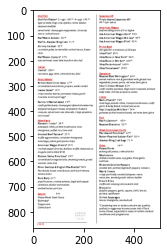

In [166]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
a=pil_to_numpy(pil_image)
plt.imshow(a)

In [178]:
help(text.bbox)

Help on Rectangle in module poppler.rectangle object:

class Rectangle(builtins.object)
 |  Rectangle(x=0, y=0, w=0, h=0, poppler_object=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x=0, y=0, w=0, h=0, poppler_object=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  as_tuple(self)
 |  
 |  is_empty(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_object(poppler_object) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  height
 |  
 |  width
 |  
 |  x
 |  
 |  y
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  bottom
 |  
 |  left
 |  


815.8584000000001

In [185]:
texts=[]
for text in page.text_list(page.TextListOption.text_list_include_font):
    texts.append({
        "size": text.get_font_size(),
        "font": text.get_font_name(),
        "text": text.text,
        "x": text.bbox.x,
        "y": text.bbox.y,
        "h": text.bbox.height,
        "w": text.bbox.width,
        "h": text.bbox.height,
        "w": text.bbox.width,
        "top": text.bbox.top,
        "bottom": text.bbox.bottom,
        "left": text.bbox.left,
        "right": text.bbox.right,
        "is_bold": "bold" in text.get_font_name().lower()
    })
text_df=pd.DataFrame(texts)
text_df

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold
0,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,18.02400,11.81376,39.587184,18.02400,29.83776,19.439900,59.027084,True
1,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,31.46400,11.81376,39.592224,31.46400,43.27776,19.439900,59.032124,True
2,10.08,AAAAAC+Cambria-Bold,Platter*,61.181180,31.46400,11.81376,36.365616,31.46400,43.27776,61.181180,97.546796,True
3,10.08,AAAAAE+Cambria,2—ppl,99.696860,31.46400,11.81376,29.387232,31.46400,43.27776,99.696860,129.084092,False
4,10.08,AAAAAE+Cambria,109.,133.474940,31.46400,11.81376,18.677232,31.46400,43.27776,133.474940,152.152172,False
...,...,...,...,...,...,...,...,...,...,...,...,...
492,10.08,AAAAAE+Cambria,certain,412.796640,792.28128,11.81376,30.088800,792.28128,804.09504,412.796640,442.885440,False
493,10.08,AAAAAE+Cambria,medical,445.052640,792.28128,11.81376,33.536160,792.28128,804.09504,445.052640,478.588800,False
494,10.08,AAAAAE+Cambria,conditions,263.259840,804.04464,11.81376,44.993088,804.04464,815.85840,263.259840,308.252928,False
495,10.08,AAAAAE+Cambria,and,310.418112,804.04464,11.81376,16.055424,804.04464,815.85840,310.418112,326.473536,False


In [186]:
print(page.text())

Shellfish                                                 Japanese A5
Shellfish Platter* 2—ppl 109. 95 4—ppl 199. 95            Triple Seared Japanese A5*
tiger prawns, king crab, oysters, clams, lobster,         44. 95 per ounce
seasonal shellfish
                                                          American Wagyu
served with: champagne mignonette, citrus soy             beef marbling score of 9 or higher
sauce, cocktail sauce                                     8oz American Wagyu Skirt* 59.95
Half Maine Lobster 38. 95                                 8oz American Wagyu Rib Cap* 95.95
Half lb. Alaskan King Crab 71. 95                         8oz American Wagyu Filet* 95.95
Shrimp Cocktail 32.95                                     Prime Beef
cucumber gelée, horseradish cocktail sauce, fresno        dry aged for a minimum of 28 days
chile                                                     10oz Filet* 89.95
Half Dozen Oysters* 27.95                                 18oz Bone-in New Y

In [192]:
boxes['']

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold
0,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,18.024,11.81376,39.587184,18.024,29.83776,19.439900,59.027084,True
233,10.08,AAAAAC+Cambria-Bold,Japanese,263.280000,18.024,11.81376,41.365296,18.024,29.83776,263.280000,304.645296,True
234,10.08,AAAAAC+Cambria-Bold,A5,306.794352,18.024,11.81376,12.490128,18.024,29.83776,306.794352,319.284480,True


In [209]:
help(text)

Help on TextBox in module poppler.page object:

class TextBox(builtins.object)
 |  TextBox(text_box)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, text_box)
 |  
 |  char_bbox(self, i)
 |  
 |  get_font_name(self, i=0)
 |  
 |  get_font_size(self)
 |  
 |  get_wmode(self, i=0)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  bbox
 |  
 |  has_font_info
 |  
 |  has_space_after
 |  
 |  rotation
 |  
 |  text
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  WritingMode = <class 'poppler.cpp.page.writing_mode_enum'>



In [210]:
menu_items=[]
for y,boxes in text_df[text_df['is_bold']].groupby("y"):
    if boxes['h'].max()>10:
        menu_items.append(" ".join([x for x in boxes['text']]))
menu_items

['Shellfish Japanese A5',
 'Shellfish Platter* Triple Seared Japanese A5*',
 'American Wagyu',
 '8oz American Wagyu Skirt*',
 'Half Maine Lobster',
 '8oz American Wagyu Rib Cap*',
 '8oz American Wagyu Filet*',
 'Half lb. Alaskan King Crab',
 'Shrimp Cocktail',
 'Prime Beef',
 '10oz Filet*',
 'Half Dozen Oysters*',
 '18oz Bone-in New York*',
 '24oz Bone-in Rib Eye*',
 '34oz Porterhouse*',
 'Caviar',
 '38oz Tomahawk*',
 'Osetra*',
 'Signature',
 'Roasted Beef Wellington*',
 'Soup/Salads',
 'British Style Onion Soup',
 'Jidori Chicken Breast',
 'Caesar Salad*',
 'Chops',
 'Rack of Lamb*',
 'Farmer’s Market Salad',
 'Veal Chop16oz Milk Fed *',
 'Fish',
 'Appetizers',
 'Pacific Salmon*',
 'Hamachi Crudo*',
 'Roasted Branzino',
 'Steak Accompaniments',
 'Pan Seared Foie Gras*',
 'Smoked Beef Tartare*',
 'Butter Poached Lobster Tail*',
 'Alaskan King Crab Legs',
 'American Wagyu Sliders*',
 'Sides',
 'Potato Purée',
 'Mushrooms',
 'Hudson Valley Foie Gras*',
 'Blistered Shishito Peppers',
 'D

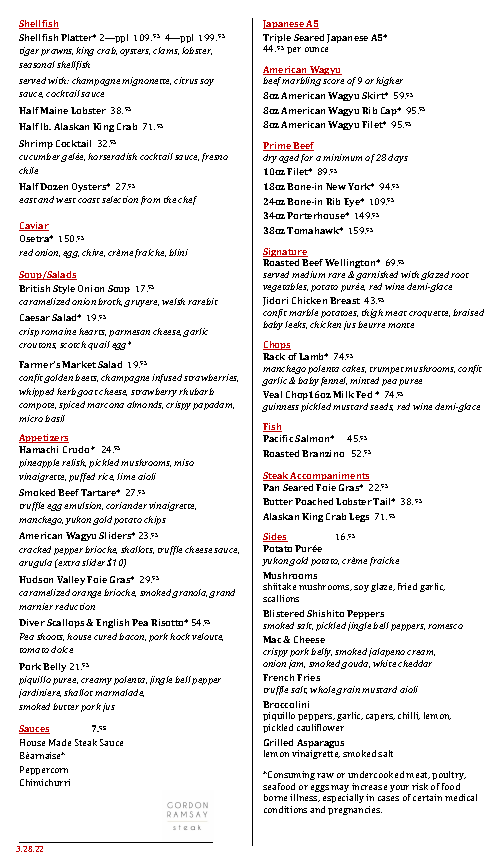

In [212]:
pil_image

Not bad, we're missing sauces and descriptions though. Also some extra section names were included like "Appetizers". Unfortunately I can't find out how to get underlined text